<a href="https://colab.research.google.com/github/saraadastan/sara/blob/master/lrrw%26wp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://gitlab.synchrotron-soleil.fr/PA/collective-effects/mbtrack2.git

Cloning into 'mbtrack2'...
remote: Enumerating objects: 1364, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1364 (delta 8), reused 0 (delta 0), pack-reused 1340
Receiving objects: 100% (1364/1364), 654.27 KiB | 1.52 MiB/s, done.
Resolving deltas: 100% (937/937), done.


In [3]:
%cd mbtrack2

/content/mbtrack2


In [4]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 10.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.4 MB 42.4 MB/s 
     |████████████████████████████████| 1.6 MB 57.3 MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438417 sha256=8184934aea344cf61ddd4210925c0bbf20287ba3c5e99430016c41375d9967c8
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


In [5]:
import numpy as np
from mbtrack2.tracking import Synchrotron, Electron
from mbtrack2.utilities import Optics

In [6]:
#%%Elettra 2.0 parameters
h = 432 # Harmonic number of the accelerator.
L = 259.2 # Ring circumference in [m].
E0 = 2.4e9 # Nominal (total) energy of the ring in [eV].
particle = Electron() # Particle considered.
ac = 0.00013968121 # Momentum compaction factor.
U0 = 0.45021768e6 # Energy loss per turn in [eV].
tau = np.array([5.621e-3, 9.217e-3, 6.777e-3]) # Horizontal, vertical and longitudinal damping times in [s].
tune = np.array([32.27, 9.15]) # Horizontal and vertical tunes.
emit = np.array([2.2670e-10, 2.267e-12]) # Horizontal and vertical equilibrium emittance in [m.rad].
sigma_0 = 6.431783914049973e-12 # Natural bunch length in [s].
sigma_delta = 0.0009345738924228619 # Equilibrium energy spread.
chro = [0.93, 2.43] # Horizontal and vertical (non-normalized) chromaticities.

local_beta = np.array([9.37, 2.004]) # Beta function at the tracking location.
local_alpha = np.array([0, 0]) # Alpha function at the tracking location.
local_dispersion = np.array([0, 0, 0, 0]) # Dispersion function and its derivative at the tracking location.
optics = Optics(local_beta=local_beta, local_alpha=local_alpha, 
                  local_dispersion=local_dispersion)

ring = Synchrotron(h=h, optics=optics, particle=particle, L=L, E0=E0, ac=ac, 
                   U0=U0, tau=tau, emit=emit, tune=tune, 
                   sigma_delta=sigma_delta, sigma_0=sigma_0, chro=chro)

In [42]:
from mbtrack2.tracking import Bunch, Beam

In [43]:
mybunch = Bunch(ring,  mp_number=1e6, current=1e-3)
mybunch.init_gaussian()

filling_pattern = np.ones(ring.h)*0.025
mybeam = Beam(ring)
mybeam.init_beam(filling_pattern, mp_per_bunch=1e3)

In [44]:
from mbtrack2.impedance import CircularResistiveWall
from mbtrack2.tracking import WakePotential

In [168]:
time = np.linspace(1.6667e-14, 3.3333e-09, 10000) # Time points where the wake function will be evaluated in [s].
frequency = np.linspace(1e9, 100e9, 10000) # Frequency points where the impedance will be evaluated in [Hz].
length = ring.L # Beam pipe length in [m].
rho = 1.7e-8 # Effective resistivity to consider in [ohm.m] as in [1].
radius = 7.5e-3 # Beam pipe radius in [m].
exact = False # If False, approxmiated formulas are used for the wake function computations.

rw = CircularResistiveWall(time, frequency, length, rho, radius, exact)

In [169]:
rw.wake_components

array(['Wlong', 'Wxdip', 'Wydip'], dtype='<U5')

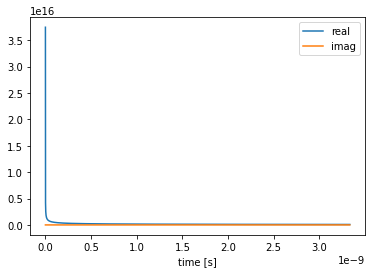

In [170]:
rw.Wydip.data.plot()

In [171]:
rw.Wydip.data

,real,imag
time [s],,
1.666700e-14,3.744965e+16,0.0
3.500287e-13,8.171931e+15,0.0
6.833903e-13,5.848467e+15,0.0
1.016752e-12,4.794783e+15,0.0
1.350114e-12,4.160939e+15,0.0
...,...,...
3.331967e-09,8.375798e+13,0.0
3.332300e-09,8.375379e+13,0.0
3.332633e-09,8.374960e+13,0.0


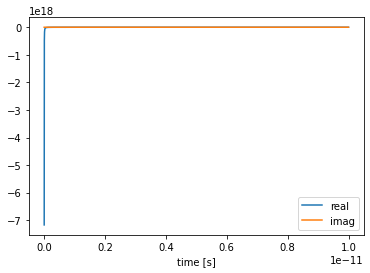

In [165]:
rw.Wlong.data.plot()

In [166]:
rw.Wlong.data

,real,imag
time [s],,
0.000000e+00,-inf,0.0
1.000100e-15,-7.170562e+18,0.0
2.000200e-15,-2.535176e+18,0.0
3.000300e-15,-1.379975e+18,0.0
4.000400e-15,-8.963202e+17,0.0
...,...,...
9.996000e-12,-7.175943e+12,0.0
9.997000e-12,-7.174866e+12,0.0
9.998000e-12,-7.173790e+12,0.0


In [167]:
rw.Wxdip.data

,real,imag
time [s],,
0.000000e+00,inf,0.0
1.000100e-15,1.528814e+17,0.0
2.000200e-15,1.081035e+17,0.0
3.000300e-15,8.826614e+16,0.0
4.000400e-15,7.644072e+16,0.0
...,...,...
9.996000e-12,1.529197e+15,0.0
9.997000e-12,1.529120e+15,0.0
9.998000e-12,1.529044e+15,0.0


In [148]:
wp = WakePotential(ring, wakefield=rw, n_bin=60)

In [149]:
wp.track(mybunch)

/content/mbtrack2/mbtrack2/tracking/wakepotential.py:151: RuntimeWarning: invalid value encountered in true_divide
  dipole = dipole/self.profile


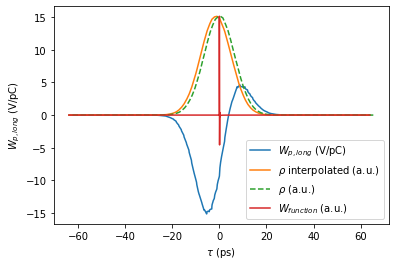

In [150]:
fig = wp.plot_last_wake("Wlong")

In [155]:
wp.reference_loss(mybunch)

/content/mbtrack2/mbtrack2/tracking/wakepotential.py:151: RuntimeWarning: invalid value encountered in true_divide
  dipole = dipole/self.profile


,TD factor,FD factor,Relative error [%]
Wlong [V/C],7.377844e+12,6.737309e+12,9.507284
Wxdip [V/C/m],-2.367633e+14,1.073055e+15,-122.064413
Wydip [V/C/m],7.456787e+14,1.073055e+15,-30.508808


In [156]:
wp.Wxdip.size

127690

In [157]:
from mbtrack2.tracking import WakePotential
from mbtrack2 import LongRangeResistiveWall

In [158]:
length = ring.L # Length of the resistive pipe to consider in [m].
rho = 1.7e-8 # Effective resistivity to consider in [ohm.m] as in [1].
radius = 7.5e-3 # Beam pipe radius to consider in [m].
types=["Wlong","Wxdip","Wydip"] # Wake types to consider. 
nt=50 # Number of turns to consider for the long range wakes.
x3=None # Horizontal effective radius of the 3rd power in [m], as Eq.27 in [1]. The default is radius.
y3=None # Vertical effective radius of the 3rd power in [m], as Eq.27 in [1]. The default is radius.
     

lrrw = LongRangeResistiveWall(ring=ring, beam=mybeam, length=length, rho=rho, radius=radius, types=types, nt=nt, x3=x3, y3=y3)

In [159]:
time.size

10000

In [160]:
for i in range(10):
  print(lrrw.Wdip(time[i],"y"))

inf
1.528814446485013e+17
1.0810350622855109e+17
8.82661432219111e+16
7.644072232425066e+16
6.837066054648407e+16
6.241358842139635e+16
5.7783754659460136e+16
5.4051753114275544e+16
5.096048154950043e+16


/content/mbtrack2/mbtrack2/tracking/wakepotential.py:688: RuntimeWarning: divide by zero encountered in double_scalars
  wdip = (1 / (pi * r3**3) * np.sqrt(self.Z0 * c * self.rho / pi) /


In [117]:
for i in range(10):
  print(lrrw.Wdip(time[i],"x"))

inf
57256141926427.72
40486206220756.44
33056848953982.465
28628070963213.86
25605725095373.63
23374722060020.43
21640787509763.777
20243103110378.22
19085380642142.574


In [89]:
lrrw.Wdip(1.000100e-15,"x")

1908442644467468.0

In [115]:
lrrw.Wdip(time,"y")[0]

/content/mbtrack2/mbtrack2/tracking/wakepotential.py:688: RuntimeWarning: divide by zero encountered in true_divide
  wdip = (1 / (pi * r3**3) * np.sqrt(self.Z0 * c * self.rho / pi) /


inf